# Importazione librerie e visualizzazione Dataset

In [22]:
import pandas as pd
import networkx as nx

In [23]:
import matplotlib.pyplot as plt

In [24]:
#Lettura del dataset:
df_trump = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv",lineterminator='\n')
df_biden = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv",lineterminator='\n')

In [25]:
print(f"Tweet with Trump hashtag: {len(df_trump)}")
print(f"Tweet with Biden hashtag: {len(df_biden)}")

Tweet with Trump hashtag: 970919
Tweet with Biden hashtag: 776886


In [26]:
#Dataframe unito (eliminati i duplicati)
df_duplicated = pd.concat([df_trump,df_biden])
df = df_duplicated.drop_duplicates(subset="tweet")

print(f"Total tweets: {len(df_duplicated)}")
print(f"Total tweets: {len(df)}")

Total tweets: 1747805
Total tweets: 1507205


In [27]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [28]:
df.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
776880,2020-11-08 23:59:37,1.325589e+18,Hypocrite!\n\n#Biden \n#Covid_19 https://t.co/...,2.0,0.0,Twitter Web App,9.583685e+17,van Lith de Jeude,LithJeude,"Stop this crazy and altruistic theory of ""We m...",...,541.0,Venus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.743523
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846
776885,2020-11-08 23:59:58,1.325589e+18,"Ik moet zeggen dat ik #Biden ""the lesser of tw...",0.0,0.0,Twitter for Android,5.863863e+08,Job,_JobO__,-voeg hier uw interessante bio toe-,...,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.747707


In [29]:
#Numero di utenti totali (potenziali nodi)
print(df["user_id"].value_counts())

user_id
7.426862e+07    1352
4.017365e+07    1324
1.244982e+18    1259
3.863951e+08    1223
8.742585e+08    1059
                ... 
1.318602e+18       1
1.207354e+18       1
4.701694e+08       1
1.028358e+18       1
1.295867e+18       1
Name: count, Length: 481068, dtype: int64


In [33]:
from collections import Counter

def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet.lower())

df['hashtags'] = df['tweet'].apply(extract_hashtags)

all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]

hashtag_counts = Counter(all_hashtags)

sorted_hashtag_counts = hashtag_counts.most_common()

# Stampare la classifica degli hashtag
print("Classifica degli hashtag più usati:")
for hashtag, count in sorted_hashtag_counts[:50]:
    print(f"{hashtag}: {count}")

/tmp/ipykernel_34/2322852772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['tweet'].apply(extract_hashtags)


Classifica degli hashtag più usati:
#trump: 863347
#biden: 500781
#joebiden: 295275
#election2020: 139924
#donaldtrump: 132085
#elections2020: 77590
#bidenharris2020: 69976
#trump2020: 66393
#vote: 58299
#electionday: 48413
#usa: 45016
#maga: 42982
#covid19: 38383
#kamalaharris: 37605
#biden2020: 29940
#electionnight: 27977
#uselection2020: 27542
#bidenharris: 26712
#america: 25089
#elecciones2020: 22864
#electionresults2020: 22861
#trumpmeltdown: 20640
#usaelections2020: 19958
#bidenharis2020: 19367
#debates2020: 19012
#democrats: 18316
#vote2020: 17682
#gop: 17331
#election: 16943
#coronavirus: 16796
#trumpvsbiden: 16670
#election2020results: 16606
#elections: 16043
#usaelection2020: 15554
#maga2020: 14578
#covid: 14239
#pennsylvania: 14156
#hunterbiden: 14129
#uselections2020: 14014
#2020election: 13844
#uselection: 13477
#cnn: 13441
#trumpislosing: 12883
#obama: 12785
#potus: 12186
#byebyetrump: 12113
#joebiden2020: 12076
#joebidenkamalaharris2020: 12041
#votehimout: 11950
#foxnews

Osservazioni:
- Informazioni temporali che vanno dal 15 ottobre 2020 al 8 novembre 2020.
- 481.000 potenziali nodi (filtraggio sulla base di like/retweet?)
- Tweet scritti in diverse lingue (concentrarsi solo su quelli in inglese?)
- Diversi valori mancanti nelle aree geografiche

# Preprocessing (filtraggio tweet/utenti)

Probabilmente il primo filtraggio che occorre fare è quello sulla lingua. Potrebbe essere meglio considerare solo i tweet in inglese (?)

In [11]:
#Filtraggio sulla base dei like
df_like_5 = df[df["likes"]>=5]
df_like_10 = df[df["likes"]>=10]
df_like_20 = df[df["likes"]>=20]
df_like_50 = df[df["likes"]>=50]

print(f"Total tweets: {len(df_like_5)}")
print(f"Total tweets: {len(df_like_10)}")
print(f"Total tweets: {len(df_like_20)}")
print(f"Total tweets: {len(df_like_50)}")
print(df_like_50["user_id"].value_counts())

Total tweets: 175404
Total tweets: 100234
Total tweets: 58783
Total tweets: 28596
user_id
1.232811e+08    338
7.042227e+17    245
3.968686e+08    241
2.783875e+09    234
3.924067e+07    199
               ... 
1.189810e+18      1
1.357710e+09      1
9.185330e+07      1
1.311773e+18      1
9.416288e+17      1
Name: count, Length: 10235, dtype: int64


In [12]:
#Filtraggio sulla base dei retweet
df_retweet_5 = df[df["retweet_count"]>=5]
df_retweet_10 = df[df["retweet_count"]>=10]
df_retweet_20 = df[df["retweet_count"]>=20]
df_retweet_50 = df[df["retweet_count"]>=50]

print(f"Total tweets: {len(df_retweet_5)}")
print(f"Total tweets: {len(df_retweet_10)}")
print(f"Total tweets: {len(df_retweet_20)}")
print(f"Total tweets: {len(df_retweet_50)}")
print(df_retweet_50["user_id"].value_counts())

Total tweets: 59557
Total tweets: 32206
Total tweets: 17720
Total tweets: 7765
user_id
1.214316e+18    149
2.909782e+07    134
1.232811e+08    105
1.824706e+07     99
4.990740e+08     78
               ... 
4.706692e+07      1
2.621748e+08      1
2.298251e+08      1
7.820675e+08      1
1.988165e+08      1
Name: count, Length: 2848, dtype: int64


In [13]:
#FILTRAGGIO BASATO SU stato= United states
df_country= df[df["country"]=="United States of America"]
print(f"Total tweets: {len(df_country)}")

print(df_country["user_id"].value_counts())
df_country.tail()

Total tweets: 297754
user_id
1.244982e+18    1259
8.742585e+08    1059
4.132841e+06     980
2.086079e+08     856
1.154952e+18     785
                ... 
2.171204e+08       1
1.406658e+07       1
1.446436e+08       1
3.845704e+07       1
1.071796e+18       1
Name: count, Length: 76160, dtype: int64


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
776827,2020-11-08 23:54:14,1.325587e+18,George W. #Bush #Congratulates #Biden And Harr...,1.0,1.0,Twitter for iPhone,4.938816e+07,Carol Falk,CAFalk,https://t.co/uuyj7Dnata Activist: #Resistance ...,...,24052.0,Wisconsin,44.430898,-89.688464,NaN,United States of America,North America,Wisconsin,WI,2020-11-09 18:32:45.705803
776845,2020-11-08 23:56:15,1.325588e+18,Will #criticalRaceTheory become ubiquitous in ...,0.0,0.0,Twitter Web App,4.095715e+08,Howard Wachtel,mindovermath,Retired college #math professor. Single. Brid...,...,12606.0,"Philadelphia, PA",39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.773127
776847,2020-11-08 23:56:21,1.325588e+18,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P,0.0,0.0,Twitter for iPhone,1.914600e+08,Sean Lassiter,IAmSeanLassiter,Sean Lassiter Photography,...,803.0,Philadelphia PA,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.731141
776865,2020-11-08 23:58:24,1.325589e+18,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,cbillinson,my love language is dismantling the patriarchy.,...,436.0,"Washington, DC",38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-11-09 18:32:45.841439
776870,2020-11-08 23:58:48,1.325589e+18,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,1.248047e+18,Dr J,DrJoeMcCarthy,Human. Free Thinker. Met Mandela. Personal. Fa...,...,311.0,Earth. 3rd Planet from Sun.,43.519630,-114.315320,NaN,United States of America,North America,Idaho,ID,2020-11-09 18:32:45.641087


# Costruisco la rete con le menzioni

* Obiettivo: costruire una rete che tenga conto delle menzioni che provengono da utenti USA con più di 15.000 followers (potenzialmente i più influenti).
* Obiettivo: costruire una rete che tenga conto delle menzioni che provengono da utenti USA con meno di 1.000 followers, studiamo comportamento tipico di persone meno famose.
* Misurazione delle principali misure di centralità: in_degree, betweness, closeness.
* Si potrebbe verificare con l'out_degree se sono presenti spam_farm (to do)
* Degree distribution (to do)
* Page rank (to do)

In [38]:
popular = False #se true, considero rete con >15.000 followers, se false considero rete con <1.000 followers

#FILTRAGGIO BASATO SU stato= United states e sul numero di follower, voglio capire se ci sono
#utenti importanti o se ho completamente rimosso profili di informazione
if popular:
    df_country_e_follower= df_country[df_country["user_followers_count"]>=15000]
else:
    df_country_e_follower= df_country[df_country["user_followers_count"]<1000]
print(f"Total tweets: {len(df_country_e_follower)}")
print(df_country_e_follower["user_id"].value_counts())
df_country_e_follower.tail()


Total tweets: 171749
user_id
1.154952e+18    785
9.751178e+17    709
7.827965e+17    598
1.710050e+07    495
3.423777e+09    459
               ... 
1.464111e+07      1
3.010652e+07      1
1.702106e+09      1
1.688463e+09      1
1.020736e+18      1
Name: count, Length: 56472, dtype: int64


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
776798,2020-11-08 23:51:43,1.325587e+18,"#Biden, Fuck you and your #maskmandate. Reall...",0.0,0.0,Twitter for iPad,1.259569e+08,Jim Tobey,Dragon9382,A USAF vetern that previously worked for FEDEX...,...,45.0,"San Antonio, TX",29.424600,-98.495141,San Antonio,United States of America,North America,Texas,TX,2020-11-09 18:32:45.688952
776799,2020-11-08 23:51:45,1.325587e+18,Speaking for the people ✊🏿 @winenance \n\n👏🏿👏🏿...,2.0,0.0,Twitter for iPhone,1.845746e+07,Kers,ItsKersiTime,"Standup Comic, Comedy Writer, World Citizen, R...",...,506.0,"Brooklyn, NY",40.650102,-73.949583,New York,United States of America,North America,New York,NY,2020-11-09 18:32:45.777585
776847,2020-11-08 23:56:21,1.325588e+18,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P,0.0,0.0,Twitter for iPhone,1.914600e+08,Sean Lassiter,IAmSeanLassiter,Sean Lassiter Photography,...,803.0,Philadelphia PA,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.731141
776865,2020-11-08 23:58:24,1.325589e+18,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,cbillinson,my love language is dismantling the patriarchy.,...,436.0,"Washington, DC",38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-11-09 18:32:45.841439
776870,2020-11-08 23:58:48,1.325589e+18,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,1.248047e+18,Dr J,DrJoeMcCarthy,Human. Free Thinker. Met Mandela. Personal. Fa...,...,311.0,Earth. 3rd Planet from Sun.,43.519630,-114.315320,NaN,United States of America,North America,Idaho,ID,2020-11-09 18:32:45.641087


In [39]:
#FILTRAGGIO BASATO SU MENZIONI+country+followers
def contains_mentions(tweet):
    return '@' in tweet

df_with_mentions = df_country_e_follower[df_country_e_follower['tweet'].apply(contains_mentions)]

print(f"Total tweets: {len(df_with_mentions)}")

df_with_mentions.head()
print(df_with_mentions["user_id"].value_counts())
#PS MI SONO ACCORTA CHE NON è BANALE REALIZZARE UN ARCO SE C'è UNA MENZIONE
#DEVI RISALIRE AL USER ID DAL NOME 
#MA QUELL'UTENTE POTREBBE NON ESISTERE NEI DATI SE NON HA PUBBLICATO NIENTE (ci interessa davvero se abbia pubblicato qualcosa?)

Total tweets: 69195
user_id
7.827965e+17    493
1.154952e+18    485
3.423777e+09    431
1.228206e+09    419
8.142944e+17    351
               ... 
1.264635e+18      1
1.536677e+07      1
1.586314e+07      1
1.036462e+18      1
3.691148e+08      1
Name: count, Length: 24081, dtype: int64


In [40]:
import re
# Initialize a directed graph
G = nx.DiGraph()

# Function to extract mentioned users from a tweet
def extract_mentions(tweet):
    return re.findall(r"@(\w+)", tweet)

# Add nodes and edges based on mentions
for index, row in df_with_mentions.iterrows():
    user_screen_name = row['user_screen_name'] #nome dell'utente
    mentions = extract_mentions(row['tweet']) #menzioni dell'utente verso altri utenti
    
    # Add the user as a node
    if not G.has_node(user_screen_name): #se utente non presente, lo aggiungo alla rete
        G.add_node(user_screen_name)
    
    # Add edges from the user to each mentioned user if the mentioned user is already a node
    for mention in mentions:
        if not G.has_node(mention): #se il nodo menzionato non è presente, lo aggiungo alla rete
            G.add_node(mention)
        if mention!=user_screen_name: #rimuovo i selfloop (automenzioni)
            G.add_edge(user_screen_name, mention)
        

# Display the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 47543
Number of edges: 87490


La rete è troppo grande, è il caso di applicare ulteriori filtraggi? (Per esempio, considerare utenti che hanno almeno un certo numero di menzioni), controllo con un parametro "min_number_of_mentions", elimino tutti i nodi che hanno un in_degree inferiore a una certa soglia.

In [28]:
min_number_of_mentions = 1

in_degrees = dict(G.in_degree())
nodes_to_remove = [node for node, degree in in_degrees.items() if degree < min_number_of_mentions]

# Rimuovere i nodi dal grafo
G.remove_nodes_from(nodes_to_remove)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4664
Number of edges: 1625


Non va bene questo approccio, elimino troppi archi all'interno della rete perdendo informazione.

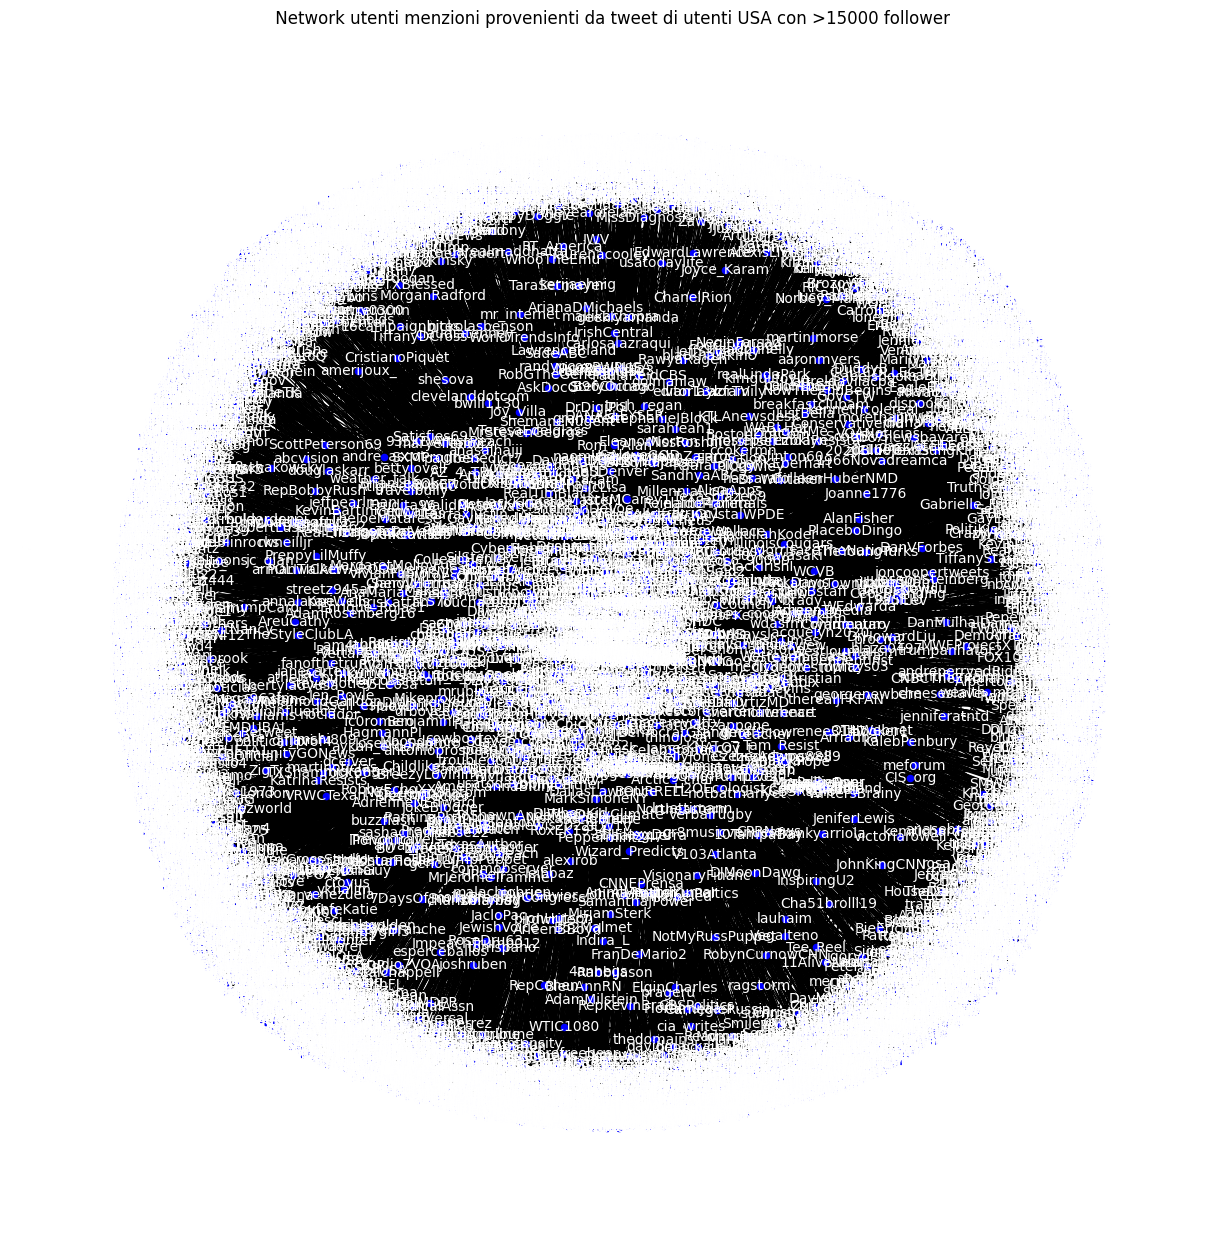

In [33]:
import matplotlib.pyplot as plt

# Plot the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=20, node_color='blue', font_size=10, font_color='white')
plt.title(' Network utenti menzioni provenienti da tweet di utenti USA con >15000 follower')
plt.show()

Per ora la rete è orientata, quindi c'è un arco da n1 a n2 se n1 menziona n2.

In [43]:
# Betweenness Centrality
"""
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['user_screen_name', 'betweenness_centrality'])
betweenness_df = betweenness_df.sort_values(by='betweenness_centrality', ascending=False)
print(betweenness_df.head())
"""

betweenness_centrality = nx.betweenness_centrality(G)

# Ordiniamo i nodi in base ai valori di betweenness centrality in ordine decrescente
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Stampiamo i nodi con i valori più alti di betweenness centrality
for node, centrality in sorted_betweenness[:10]: #stampo solo i migliori 10
    print(f'Nodo: {node}, Betweenness Centrality: {centrality:.6f}')

Nodo: Dolphfinn33, Betweenness Centrality: 0.000000
Nodo: Mikey_Poirier, Betweenness Centrality: 0.000000
Nodo: joebiden2511, Betweenness Centrality: 0.000000
Nodo: 78tiger, Betweenness Centrality: 0.000000
Nodo: EEHELI, Betweenness Centrality: 0.000000
Nodo: jlr_1969, Betweenness Centrality: 0.000000
Nodo: startchangeri, Betweenness Centrality: 0.000000
Nodo: WIS_Independent, Betweenness Centrality: 0.000000
Nodo: ArnyGrape, Betweenness Centrality: 0.000000
Nodo: notsolittleold1, Betweenness Centrality: 0.000000


Betweness centrality molto bassa

In [44]:
# Degree Centrality
"""
degree_centrality = nx.degree_centrality(G)
degree_df = pd.DataFrame(list(degree_centrality.items()), columns=['user_screen_name', 'degree_centrality'])
degree_df = degree_df.sort_values(by='degree_centrality', ascending=False)
print(degree_df.head())
"""

degree_centrality = nx.in_degree_centrality(G)

# Ordiniamo i nodi in base ai valori di degree centrality in ordine decrescente
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Stampiamo i nodi con i valori più alti di degree centrality
for node, centrality in sorted_degree[:10]: #stampo solo i migliori 10
    print(f'Nodo: {node}, Degree Centrality: {centrality:.6f}')

Nodo: realDonaldTrump, Degree Centrality: 0.165980
Nodo: JoeBiden, Degree Centrality: 0.123217
Nodo: KamalaHarris, Degree Centrality: 0.037188
Nodo: POTUS, Degree Centrality: 0.017984
Nodo: DonaldJTrumpJr, Degree Centrality: 0.017584
Nodo: CNN, Degree Centrality: 0.017395
Nodo: YouTube, Degree Centrality: 0.015923
Nodo: GOP, Degree Centrality: 0.015818
Nodo: FoxNews, Degree Centrality: 0.015797
Nodo: ProjectLincoln, Degree Centrality: 0.010769


In [45]:
#Closeness 
"""
closeness_centrality = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['user_screen_name', 'closeness_centrality'])
closeness_df = closeness_df.sort_values(by='closeness_centrality', ascending=False)
print(closeness_df.head())
"""

closeness_centrality = nx.closeness_centrality(G)

# Ordiniamo i nodi in base ai valori di degree centrality in ordine decrescente
sorted_degree = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Stampiamo i nodi con i valori più alti di degree centrality
for node, centrality in sorted_degree[:10]: #stampo solo i migliori 10
    print(f'Nodo: {node}, Closeness Centrality: {centrality:.6f}')

Nodo: realDonaldTrump, Closeness Centrality: 0.165981
Nodo: JoeBiden, Closeness Centrality: 0.123219
Nodo: KamalaHarris, Closeness Centrality: 0.037190
Nodo: POTUS, Closeness Centrality: 0.017985
Nodo: DonaldJTrumpJr, Closeness Centrality: 0.017585
Nodo: CNN, Closeness Centrality: 0.017396
Nodo: YouTube, Closeness Centrality: 0.015923
Nodo: GOP, Closeness Centrality: 0.015819
Nodo: FoxNews, Closeness Centrality: 0.015798
Nodo: ProjectLincoln, Closeness Centrality: 0.010770


Rimuovendo i nodi isolati, la rete diventa più densa e le misure di centralità potrebbero aumentare per alcuni nodi. Questo accade perché la centralità è spesso una misura relativa e viene calcolata rispetto all'intera rete. Eliminare i nodi che non hanno connessioni (e quindi non contribuiscono alla rete) può far sì che i nodi rimanenti abbiano un impatto maggiore.

In [46]:
# Rimuovere i nodi isolati
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Display the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

#Vengono rimossi pochi nodi (una ventina, probabilmente sono nodi che si automenzionano e basta)

Number of nodes: 46971
Number of edges: 87490


In [39]:
"""
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['user_screen_name', 'betweenness_centrality'])
betweenness_df = betweenness_df.sort_values(by='betweenness_centrality', ascending=False)
print(betweenness_df.head())
#Closeness 
closeness_centrality = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['user_screen_name', 'closeness_centrality'])
closeness_df = closeness_df.sort_values(by='closeness_centrality', ascending=False)
print(closeness_df.head())
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_df = pd.DataFrame(list(degree_centrality.items()), columns=['user_screen_name', 'degree_centrality'])
degree_df = degree_df.sort_values(by='degree_centrality', ascending=False)
print(degree_df.head())
"""

"\n# Betweenness Centrality\nbetweenness_centrality = nx.betweenness_centrality(G)\nbetweenness_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['user_screen_name', 'betweenness_centrality'])\nbetweenness_df = betweenness_df.sort_values(by='betweenness_centrality', ascending=False)\nprint(betweenness_df.head())\n#Closeness \ncloseness_centrality = nx.closeness_centrality(G)\ncloseness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['user_screen_name', 'closeness_centrality'])\ncloseness_df = closeness_df.sort_values(by='closeness_centrality', ascending=False)\nprint(closeness_df.head())\n# Degree Centrality\ndegree_centrality = nx.degree_centrality(G)\ndegree_df = pd.DataFrame(list(degree_centrality.items()), columns=['user_screen_name', 'degree_centrality'])\ndegree_df = degree_df.sort_values(by='degree_centrality', ascending=False)\nprint(degree_df.head())\n"

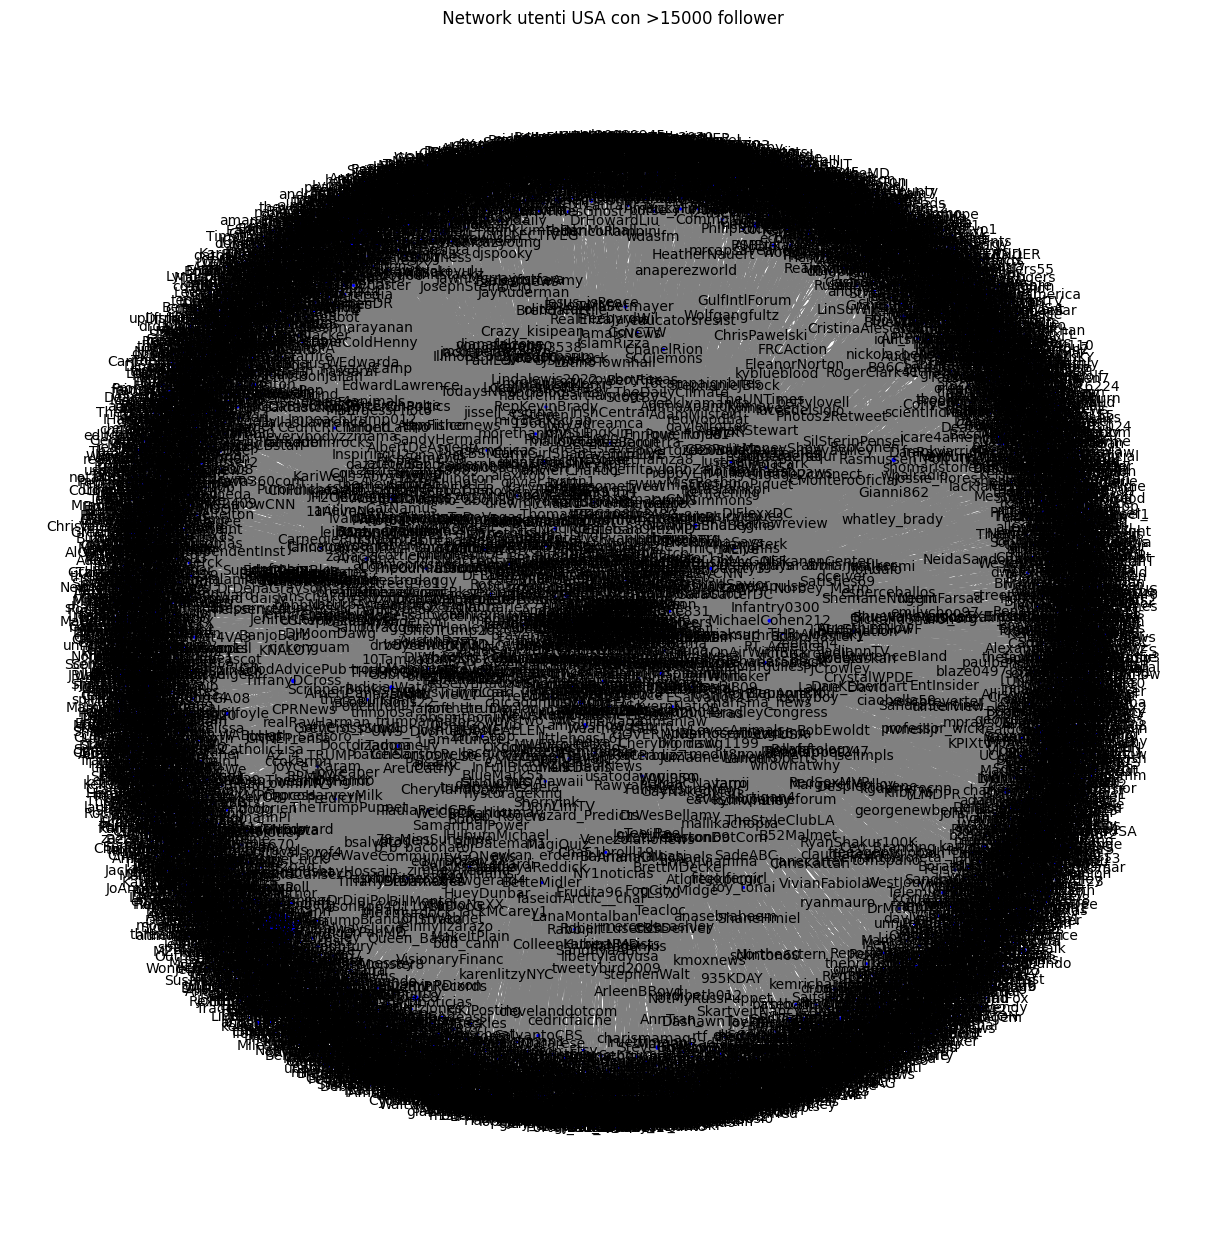

In [37]:
import matplotlib.pyplot as plt

# Plot the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)

#Nodi piu grandi sono associati a degree centrality maggiore
node_size = [v * 10000 for v in degree_centrality.values()]


nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='blue', font_size=10, font_color='black', edge_color='gray')
plt.title(' Network utenti USA con >15000 follower')
plt.show()

# Costruisco la rete geografica
* è una rete non orientata
* Considero solo gli utenti negli USA e che hanno stato!=null
* Inserisco un arco tra gli utenti dello stesso stato
* Classifico ogni utente in pro-trump / pro-biden e lo coloro di rosso / blu
* Creazione dei sottografi: Utilizziamo G.subgraph(nodes) per creare sottografi per ciascuno stato, selezionando i nodi che appartengono a quel particolare stato.
* **Analisi degli stati con più sostenitori di Trump:** Conta il numero di nodi con preferenza politica "Trump" per ogni stato e stampa i risultati ordinati per numero decrescente.
* **Fornire una predizione dell'esito delle elezioni e confrontarlo con ground trouth**




In [47]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [48]:
from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1

# Caricare il modello di sentiment analysis
classifier = pipeline("text-classification", model="DT12the/distilbert-sentiment-analysis", device=device)

2024-07-10 09:05:22.168024: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 09:05:22.168155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 09:05:22.278590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/640 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

In [49]:
# Definire una funzione per classificare i tweet
#questa è approssimativa, perche se c'è un tweet con due tag?
#inoltre devo considerare una lista di tag con tutte le varianti di tag 
def classify_tweet(tweet):
    result = classifier(tweet)[0]
    if 'Trump' in tweet:
        return 'pro-Trump' if result['label'] == 'LABEL_0' else 'anti-Trump'
    elif 'Biden' in tweet:
        return 'pro-Biden' if result['label'] == 'LABEL_0' else 'anti-Biden'
    else:
        return 'neutral' 

**Costruzione rete**

In [27]:
print(df.iloc[5]['tweet'])

classify_tweet(df.iloc[5]['tweet'])

@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut 

She cried to #Trump begging for a job!


'anti-Trump'

In [37]:
df_country_e_follower= df_country[df_country["user_followers_count"]<1000] #prendo gli utenti meno "popolari"
print(f"Total tweets: {len(df_country_e_follower)}")
print(df_country_e_follower["user_id"].value_counts())

#Concatenazione dei tweet per l'utente
grouped_df = df_country_e_follower.groupby('user_id')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(f"Total tweets after concate: {len(grouped_df)}")

#Drop colonna tweet dal primo dataframe
df_dropped = df_country_e_follower.drop(columns=['tweet'])

#Faccio la join per avere tutti i tweet insieme
df_conc = pd.merge(df_dropped, grouped_df, on='user_id', how='inner')
print(df_conc["user_id"].value_counts())
df_conc.head()

Total tweets: 171749
user_id
1.154952e+18    785
9.751178e+17    709
7.827965e+17    598
1.710050e+07    495
3.423777e+09    459
               ... 
1.464111e+07      1
3.010652e+07      1
1.702106e+09      1
1.688463e+09      1
1.020736e+18      1
Name: count, Length: 56472, dtype: int64
Total tweets after concate: 56472
user_id
1.154952e+18    785
9.751178e+17    709
7.827965e+17    598
1.710050e+07    495
3.423777e+09    459
               ... 
1.464111e+07      1
3.010652e+07      1
1.702106e+09      1
1.688463e+09      1
1.020736e+18      1
Name: count, Length: 56472, dtype: int64


,created_at,tweet_id,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,tweet
0,2020-10-15 00:00:18,1.316529e+18,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",2017-08-24 16:45:49,...,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712,@DeeviousDenise @realDonaldTrump @nypost There...
1,2020-10-15 00:00:20,1.316529e+18,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",2012-03-30 00:30:54,...,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243,One of the single most effective remedies to e...
2,2020-10-15 00:00:26,1.316529e+18,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,...,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,#Trump #PresidentTrump #Trump2020LandslideVict...
3,2020-10-15 00:01:08,1.316530e+18,3.0,2.0,Twitter for iPhone,1.946504e+08,MoClarker,MoClarker,Media Maven/Scientist/Fan O Fauci,2010-09-24 17:15:43,...,Santa Monica Beach,47.005211,-88.962910,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:00:07.091114077,"@cnnbrk #Trump owes #RicardoAguirre $730,000 t..."
4,2020-10-15 00:01:23,1.316530e+18,0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,2010-01-04 04:34:39,...,"Tampa, Florida",27.947760,-82.458444,Tampa,United States of America,North America,Florida,FL,2020-10-21 00:00:10.076846320,"Comments on this? ""Do Democrats Understand how..."


In [59]:
G_geo = nx.Graph() #NN orient

# Aggiungi nodi (utenti degli USA)
for index, row in df_conc.iterrows(): 
    if  pd.notnull(row['state']):
        political_preference=classify_tweet(row['tweet'])
        #print(political_preference)
        G_geo.add_node(row['user_screen_name'], state=row['state'],
                   political_preference=political_preference)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
#aggiunta archi
for u in G_geo.nodes():
    for v in G_geo.nodes():
        if u != v and G_geo.nodes[u]['state'] == G_geo.nodes[v]['state']:
            G_geo.add_edge(u, v, relationship='same_state')

In [ ]:
# Display the number of nodes and edges
print(f"Number of nodes: {G_geo.number_of_nodes()}")
print(f"Number of edges: {G_geo.number_of_edges()}")

In [1]:
# Colorazione dei nodi in base alla political_preference
node_colors = []
for node in G_geo.nodes():
    if G_geo.nodes[node]['political_preference'] == 'pro-Biden' or G_geo.nodes[node]['political_preference'] == 'anti-Trump':
        node_colors.append('blue')  # Colore blu per i sostenitori di Biden
    elif G_geo.nodes[node]['political_preference'] == 'pro-Trump'or G_geo.nodes[node]['political_preference'] == 'anti-Biden':
        node_colors.append('red')   # Colore rosso per i sostenitori di Trump
    else:
        node_colors.append('gray')  # Colore grigio per i neutrali
        
# Disegna il grafo con i nodi colorati
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_geo, k=0.1)
nx.draw(G_geo, pos, with_labels=True, node_color=node_colors, node_size=20, font_size=0, font_color='black', edge_color='gray')


NameError: name 'G_geo' is not defined

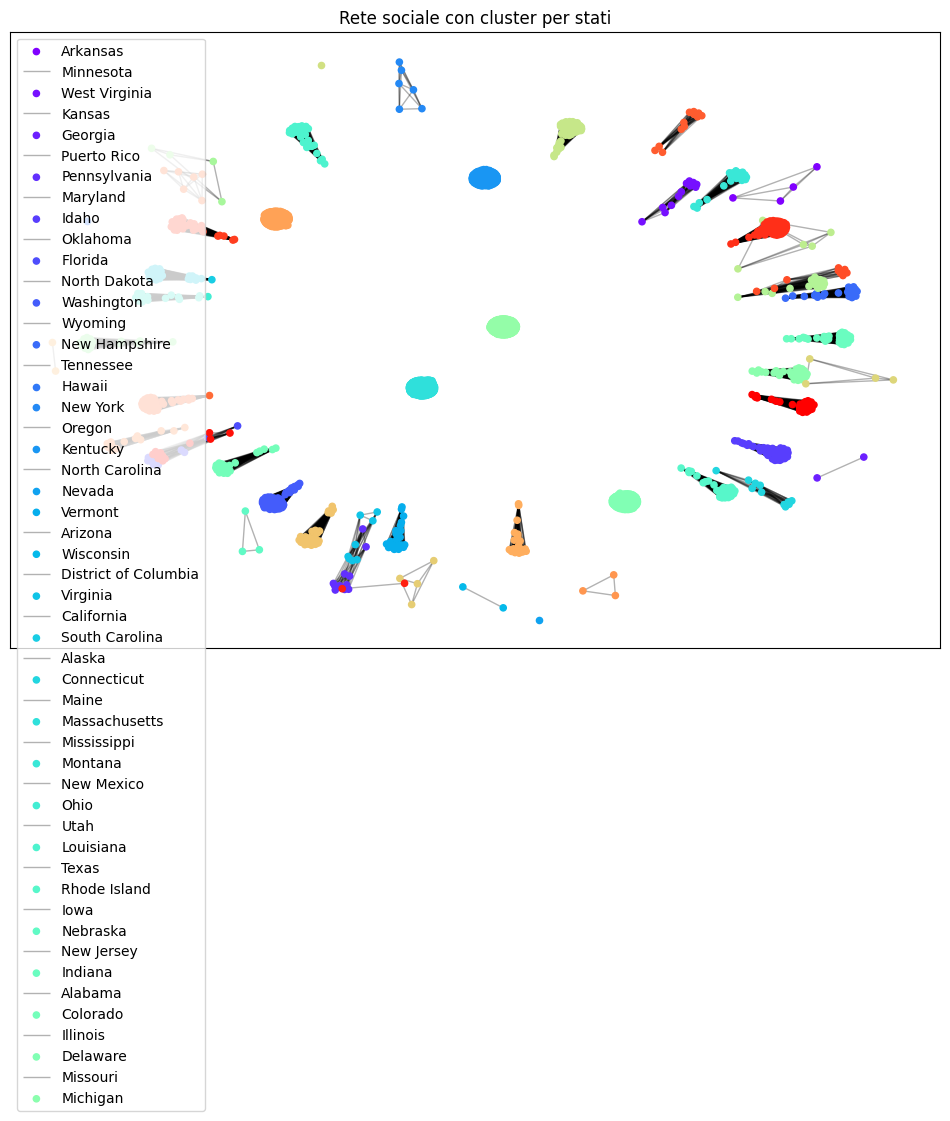

In [19]:
"""
import matplotlib.cm as cm
import numpy as np

# Creazione dei sottografi per ciascuno stato
state_graphs = {}
for state in set(nx.get_node_attributes(G_geo, 'state').values()):
    state_graphs[state] = G_geo.subgraph([n for n, d in G_geo.nodes(data=True) if d['state'] == state])

# Disegna la rete con i cluster stati
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_geo, k=0.1)

# Genera una lista di colori
colors = cm.rainbow(np.linspace(0, 1, len(state_graphs)))

# Disegna i sottografi per ciascuno stato
for color, (state, subgraph) in zip(colors, state_graphs.items()):
    nx.draw_networkx_nodes(subgraph, pos, node_size=20, label=state, node_color=[color] * subgraph.number_of_nodes())
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
    

plt.title('Rete sociale con cluster per stati')
plt.legend(state_graphs.keys())
plt.show()
"""

# Costruisco la rete di similarità con gli hashtag

In [38]:
df_country_e_follower= df_country[df_country["user_followers_count"]<1000] #prendo gli utenti meno "popolari"
print(f"Total tweets: {len(df_country_e_follower)}")
print(df_country_e_follower["user_id"].value_counts())

#Concatenazione dei tweet per l'utente
grouped_df = df_country_e_follower.groupby('user_id')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(f"Total tweets after concate: {len(grouped_df)}")

#Drop colonna tweet dal primo dataframe
df_dropped = df_country_e_follower.drop(columns=['tweet'])

#Faccio la join per avere tutti i tweet insieme
df_conc = pd.merge(df_dropped, grouped_df, on='user_id', how='inner')
print(df_conc["user_id"].value_counts())
df_conc.head()

Total tweets: 171749
user_id
1.154952e+18    785
9.751178e+17    709
7.827965e+17    598
1.710050e+07    495
3.423777e+09    459
               ... 
1.464111e+07      1
3.010652e+07      1
1.702106e+09      1
1.688463e+09      1
1.020736e+18      1
Name: count, Length: 56472, dtype: int64
Total tweets after concate: 56472
user_id
1.154952e+18    785
9.751178e+17    709
7.827965e+17    598
1.710050e+07    495
3.423777e+09    459
               ... 
1.464111e+07      1
3.010652e+07      1
1.702106e+09      1
1.688463e+09      1
1.020736e+18      1
Name: count, Length: 56472, dtype: int64


,created_at,tweet_id,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,tweet
0,2020-10-15 00:00:18,1.316529e+18,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",2017-08-24 16:45:49,...,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712,@DeeviousDenise @realDonaldTrump @nypost There...
1,2020-10-15 00:00:20,1.316529e+18,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",2012-03-30 00:30:54,...,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243,One of the single most effective remedies to e...
2,2020-10-15 00:00:26,1.316529e+18,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,...,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,#Trump #PresidentTrump #Trump2020LandslideVict...
3,2020-10-15 00:01:08,1.316530e+18,3.0,2.0,Twitter for iPhone,1.946504e+08,MoClarker,MoClarker,Media Maven/Scientist/Fan O Fauci,2010-09-24 17:15:43,...,Santa Monica Beach,47.005211,-88.962910,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:00:07.091114077,"@cnnbrk #Trump owes #RicardoAguirre $730,000 t..."
4,2020-10-15 00:01:23,1.316530e+18,0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,2010-01-04 04:34:39,...,"Tampa, Florida",27.947760,-82.458444,Tampa,United States of America,North America,Florida,FL,2020-10-21 00:00:10.076846320,"Comments on this? ""Do Democrats Understand how..."


Osservazione: bisognerebbe forse creare dei macro-hashtag. Hashtag simili dovrebbero appartenere a un unico hashtag più generale. Per ora costruiamo la rete senza tener conto di questo.

In [41]:
# Funzione per estrarre gli hashtag da un tweet
def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet.lower())

# Aggiungere una colonna con gli hashtag estratti
df_final = df_conc.copy()
df_final['hashtags'] = df_conc['tweet'].apply(extract_hashtags)

# Aggregare gli hashtag per ogni utente
user_hashtags = df_final.groupby('user_id')['hashtags'].apply(lambda x: set().union(*x)).reset_index()

user_hashtags.head()

,user_id,hashtags
0,10022.0,"{#joebiden, #biden, #bidenharristosaveamerica,..."
1,11493.0,{#joebiden}
2,11989.0,"{#biden, #election2020}"
3,65473.0,{#trump}
4,72393.0,"{#votecalifornia, #2020blueflush, #vote, #qano..."


In [ ]:
# Funzione per calcolare la similarità di Jaccard
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union == 0:
        return 0
    return intersection / union

# Calcolare la similarità di Jaccard tra ogni coppia di utenti
edges = []
for (user1, hashtags1), (user2, hashtags2) in combinations(user_hashtags.itertuples(index=False), 2):
    similarity = jaccard_similarity(hashtags1, hashtags2)
    if similarity > 0:  # Aggiungere solo archi con similarità positiva
        edges.append((user1, user2, similarity))

# Creare un grafo vuoto
G = nx.Graph()

# Aggiungere nodi (utenti)
for user in user_hashtags['user']:
    G.add_node(user)

# Aggiungere archi con pesi (similarità di Jaccard)
for user1, user2, weight in edges:
    G.add_edge(user1, user2, weight=weight)

# Disegnare il grafo
pos = nx.spring_layout(G)  # Posizionamento dei nodi
weights = nx.get_edge_attributes(G, 'weight').values()

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw_networkx_edges(G, pos, width=list(weights))

plt.show()

# Costruisco la rete con similarità usando BERT

In [ ]:
#todo